In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

import probDistInputNoise as model
import probTools as tools



# Checking stuff

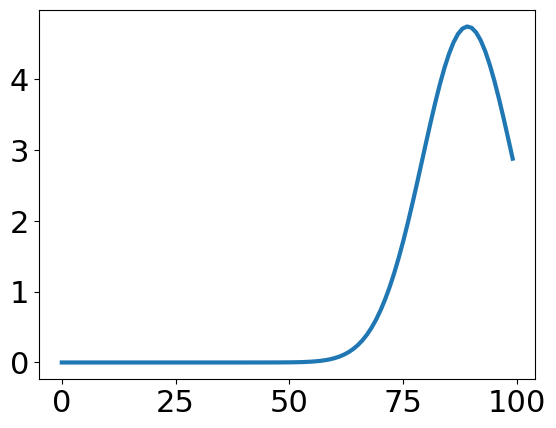

In [2]:
p_m_given_p_input = model.MI_efficient_encoding(0.9, 0.1)

plt.plot(p_m_given_p_input[0])

In [3]:
output_scale, output_prob_dist = model.output_prob_distribution(tools.input_scale_full, [0.4], 0.5)

output_prob_dist


(100,)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.24795591, 3.34784966, 3.43583186, 3.51174405, 3.57614323,
        3.62903533, 3.6707517 , 3.70168137, 3.72205634, 3.73201439,
        3.7320364 , 3.72240348, 3.70339637, 3.67529327, 3.63836864,
        3.59284295, 3.53898545, 3.47710777, 3.4074692 , 3.33033012,
        3.24595456, 3.15461321, 3.05646308, 2.95189964, 2.84125699,
        2.72480209, 2.60286435, 2.47593834, 2.34431432, 2.20859593,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [4]:
output_scale, output_prob_dist = model.output_prob_distribution(tools.input_scale_full,tools.input_scale_full, 0.1)

output_means = model.output_mean(tools.input_scale_full,tools.input_scale_full, 0.05)

(100,)
(100,)


In [5]:
np.shape(output_prob_dist)
np.shape(output_means)

(100,)

# Bias and variability predictions

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


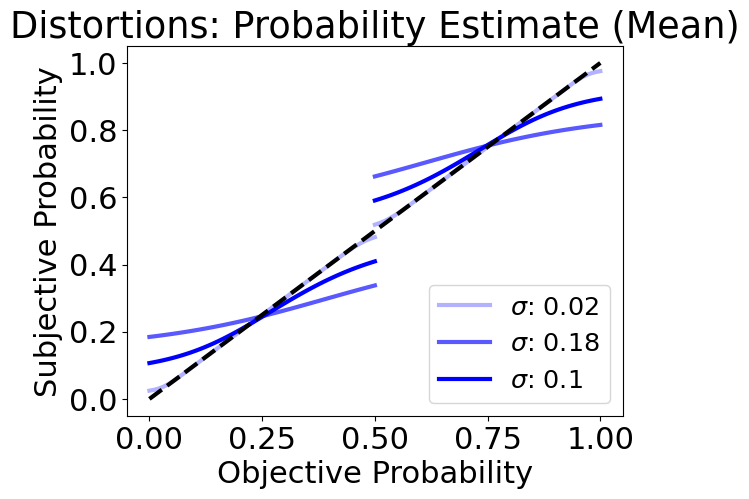

In [50]:
import matplotlib.pyplot as plt

sigma1 = 0.02
# sigma2 = 0.18
sigma3 = 0.1


# Assuming 'tools' is a module or class that provides the required functions
output_scale, output_prob_dist1 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_scale, output_prob_dist2 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_scale, output_prob_dist3 = model.output_prob_distribution(tools.input_scale_half1,tools.input_scale_half1,sigma3)

output_means11 = model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_means21 =  model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_means31 =  model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma3)
output_means12 = model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma1)
output_means22 =  model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma2)
output_means32 =  model.output_mean(tools.input_scale_half2,tools.input_scale_half2, sigma3)

output_variances11 = model.output_variance(tools.input_scale_half1,tools.input_scale_half1, sigma1)
output_variances21 = model.output_variance(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_variances31 = model.output_variance(tools.input_scale_half1, tools.input_scale_half1,sigma3)

plt.plot(tools.input_scale_half1,output_means11, alpha=0.3, c="b", label=f'$\sigma$: {sigma1}')
plt.plot(tools.input_scale_half1,output_means21, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale_half1,output_means31, alpha=1.0, c="b", label=f'$\sigma$: {sigma3}')
plt.plot(tools.input_scale_half2,output_means12, alpha=0.3, c="b")
plt.plot(tools.input_scale_half2,output_means22, alpha=0.65, c="b")
plt.plot(tools.input_scale_half2,output_means32, alpha=1.0, c="b")


plt.plot(tools.input_scale_full,tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Subjective Probability')
plt.title('Distortions: Probability Estimate (Mean)')

plt.legend(loc='lower right', fontsize='small')


# Show the plot (optional)
plt.show()


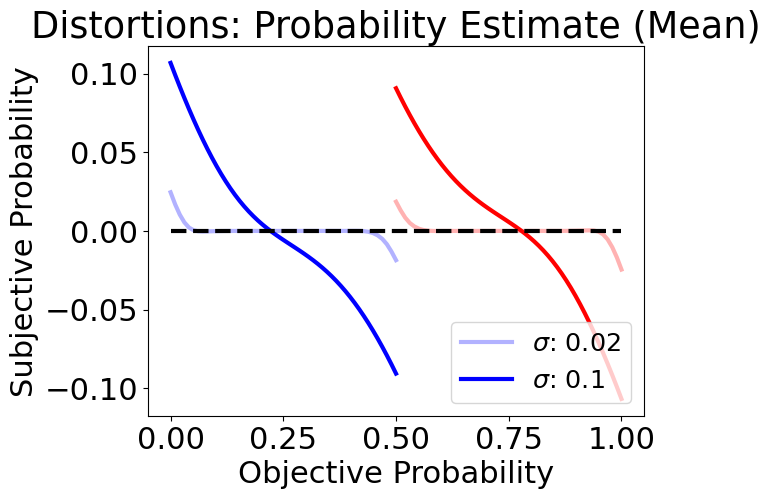

In [51]:


import matplotlib.pyplot as plt


plt.plot(tools.input_scale_half1,output_means11-tools.input_scale_half1, alpha=0.3, c="b", label=f'$\sigma$: {sigma1}')
# plt.plot(tools.input_scale_half1,output_means21-tools.input_scale_half1, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale_half1,output_means31-tools.input_scale_half1, alpha=1.0, c="b", label=f'$\sigma$: {sigma3}')
plt.plot(tools.input_scale_half2,output_means12-tools.input_scale_half2, alpha=0.3, c="r")
# plt.plot(tools.input_scale_half2,output_means22-tools.input_scale_half2, alpha=0.65, c="r")
plt.plot(tools.input_scale_half2,output_means32-tools.input_scale_half2, alpha=1.0, c="r")



plt.plot(tools.input_scale_full,tools.input_scale_full-tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Subjective Probability')
plt.title('Distortions: Probability Estimate (Mean)')

plt.legend(loc='lower right', fontsize='small')


# Show the plot (optional)
plt.show()


(100,)
(100,)


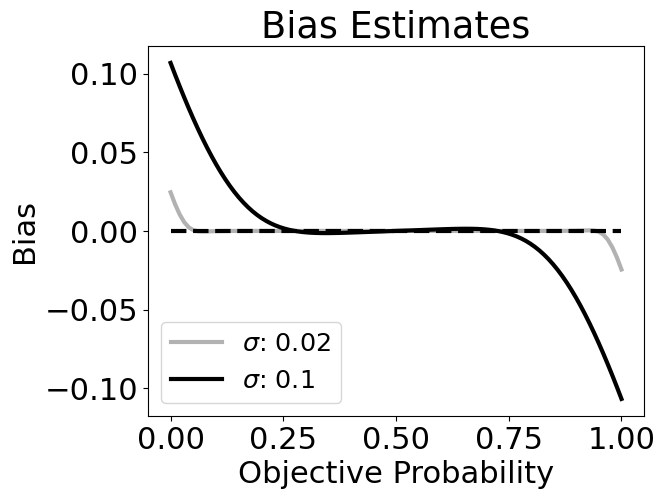

In [52]:
# sigma1 = 0.05
# sigma2 = 0.18
# sigma3 = 0.02

output_means1 = model.output_mean(tools.input_scale_full,tools.input_scale_full, sigma1)
# output_means2 =  model.output_mean(tools.input_scale_half1,tools.input_scale_half1, sigma2)
output_means3 =  model.output_mean(tools.input_scale_full,tools.input_scale_full, sigma3)

plt.plot(tools.input_scale_full,output_means1-tools.input_scale_full, alpha=0.3, c="k", label=f'$\sigma$: {sigma1}')
# plt.plot(tools.input_scale,output_means2-tools.input_scale, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale_full,output_means3-tools.input_scale_full, alpha=1.0, c="k", label=f'$\sigma$: {sigma3}')

plt.plot(tools.input_scale_full,tools.input_scale_full-tools.input_scale_full, "--", c="k")

plt.xlabel('Objective Probability')
plt.ylabel('Bias')
plt.title('Bias Estimates')

plt.legend(loc='lower left', fontsize='small')


# Show the plot (optional)
plt.show()

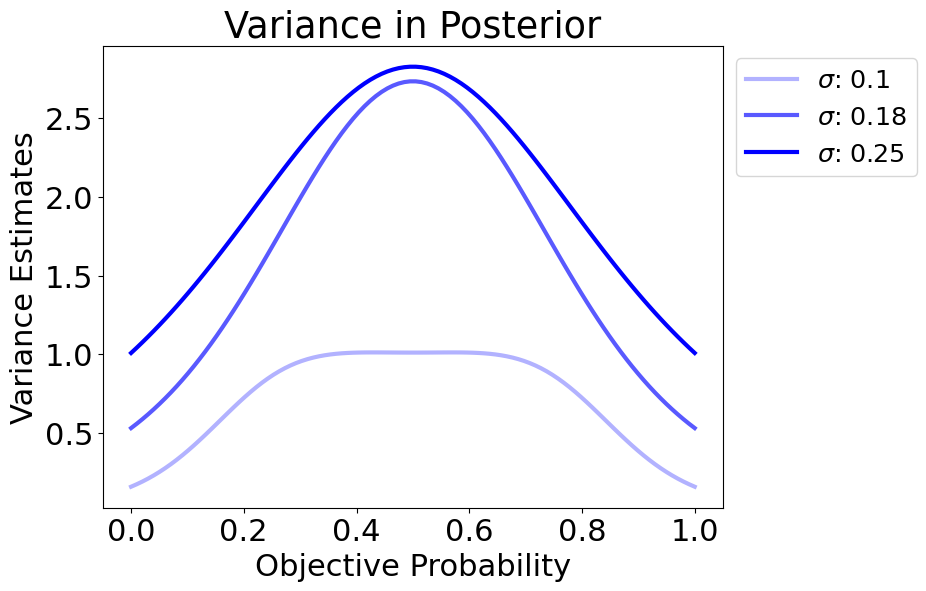

In [4]:

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

plt.plot(tools.input_scale, output_variances1, alpha=0.3, c="b", label=f'$\sigma$: {sigma1}')
plt.plot(tools.input_scale, output_variances2, alpha=0.65, c="b", label=f'$\sigma$: {sigma2}')
plt.plot(tools.input_scale, output_variances3, alpha=1.0, c="b", label=f'$\sigma$: {sigma3}')

plt.xlabel('Objective Probability')
plt.ylabel('Variance Estimates')
plt.title('Variance in Posterior')

# Place legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


# Show the plot (optional)
plt.show()

In [38]:
np.shape(output_variances1)

()

(100,)
(100,)


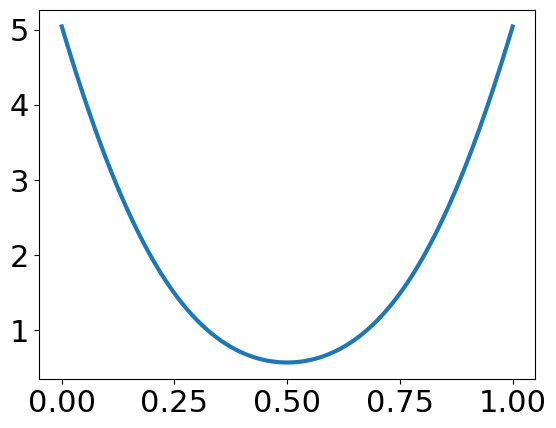

In [106]:
import numpy as np
import random
# Number of samples
num_samples = 1000

# Initialize a list to store the average absolute differences for each distribution
average_absolute_differences = []

for distribution in output_prob_dist:
    absolute_differences = []

    for i in range(num_samples):
        # Sample 2 random points from the distribution
        sampled_point1 = random.choice(distribution)
        sampled_point2 = random.choice(distribution)
        
        # Calculate the absolute difference between the sampled points
        absolute_diff = np.abs(sampled_point1 - sampled_point2)
        
        # Store the absolute difference
        absolute_differences.append(absolute_diff)

    # Calculate the average absolute difference for this distribution
    average_absolute_difference = np.mean(absolute_differences)
    
    # Append to the list of averages
    average_absolute_differences.append(average_absolute_difference)

# 'average_absolute_differences' now contains the average absolute differences for each of the 101 distributions


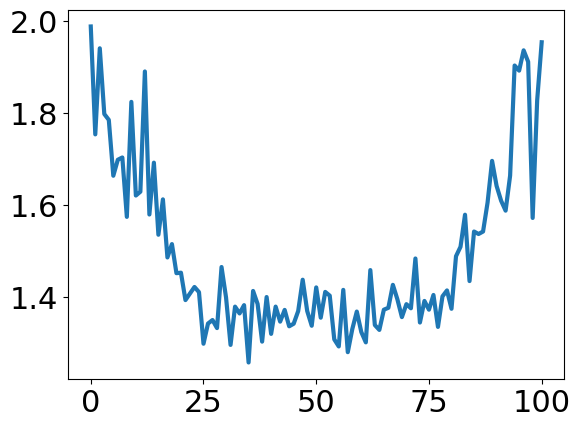

In [107]:
plt.plot(average_absolute_differences)

array([[-0.05596273, -0.05596273, -0.05596273, ..., -0.05596273,
        -0.05596273, -0.05596273],
       [-0.05844131, -0.05844131, -0.05844131, ..., -0.05844131,
        -0.05844131, -0.05844131],
       [-0.06133172, -0.06133172, -0.06133172, ..., -0.06133172,
        -0.06133172, -0.06133172],
       ...,
       [-0.93866828, -0.93866828, -0.93866828, ..., -0.93866828,
        -0.93866828, -0.93866828],
       [-0.94155869, -0.94155869, -0.94155869, ..., -0.94155869,
        -0.94155869, -0.94155869],
       [-0.94403727, -0.94403727, -0.94403727, ..., -0.94403727,
        -0.94403727, -0.94403727]])

# discriminability

In [39]:
p0 = np.linspace(0.0,1.0,101)
diff = []
prior = tools.prior_prob(p0)
sigma_rep = 0.3
gap = 1

for i in range(101-gap):
    pExt1 = p0[i]
    p_pExt_given_m1 = tools.sensory_noise(pExt1, sigma_rep, tools.ext_prob_grid)
    post1 = p_pExt_given_m1*prior
       
    pExt2 = p0[i+gap]
    p_pExt_given_m2 = tools.sensory_noise(pExt2, sigma_rep, tools.ext_prob_grid)
    post2 = p_pExt_given_m2*prior

    diff.append(tools.diff_dist(p0, post2, post1))

c = diff

# plt.plot(tools.ext_prob_grid, x0)
# x0-tools.ext_prob_grid

Text(0.5, 1.0, 'Difference in inferred distributions \nbetween 2 objective probabilities of gap 0.01')

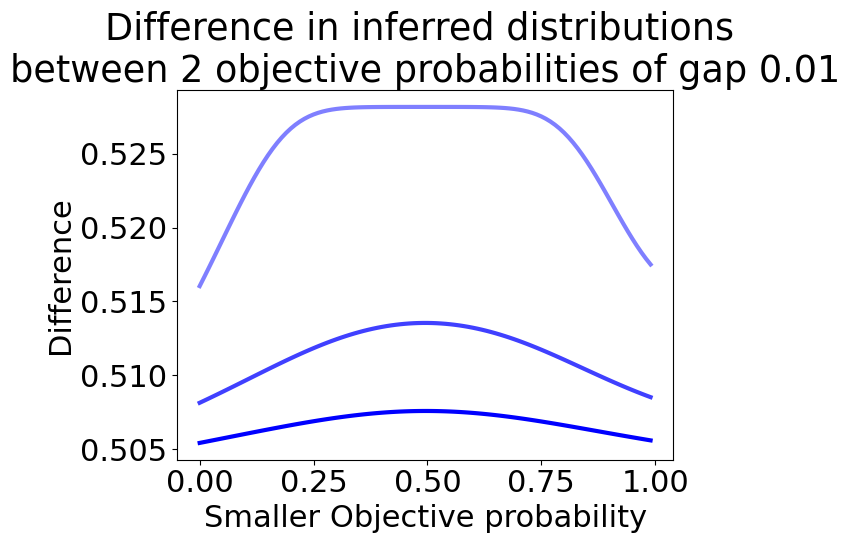

In [41]:
plt.plot(p0[:-gap], a, alpha = 0.5, color = "b")
plt.plot(p0[:-gap], b, alpha = 0.75, color = "b")
plt.plot(p0[:-gap], c, alpha = 1., color = "b")
# plt.plot(p0[:-gap], b)
plt.ylabel("Difference")
plt.xlabel("Smaller Objective probability")
plt.title("Difference in inferred distributions \nbetween 2 objective probabilities of gap "+str(p0[1]))

In [6]:
model.subject_theta_estimate(sigma_rep = 0.1, loss_exp=2)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

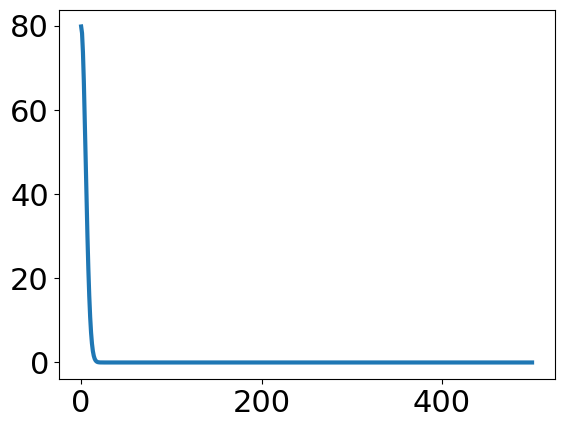

In [3]:
plt.plot(model.MI_efficient_encoding(0.5, 0.01)[0])

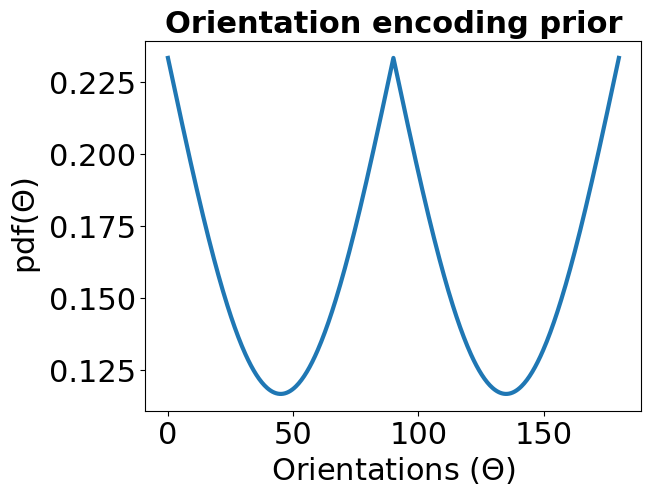

In [2]:
plt.plot(model.stim_ori_grid*90./np.pi, tools.prior_ori(tools.stim_ori_grid))
trapezoid(tools.prior_ori(tools.stim_ori_grid), tools.stim_ori_grid)


plt.ylabel("pdf($\Theta$)")
plt.xlabel("Orientations ($\Theta$)")
plt.title("Orientation encoding prior", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

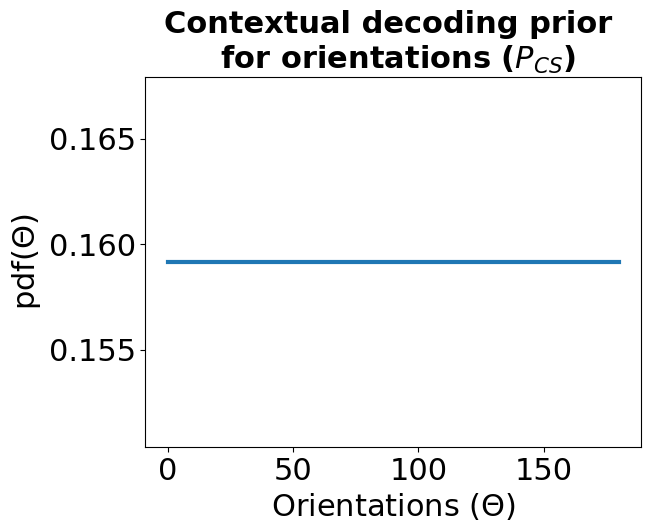

In [3]:
plt.plot(model.stim_ori_grid*90./np.pi, tools.context_prior_ori(tools.stim_ori_grid))
trapezoid(tools.prior_ori(tools.stim_ori_grid), tools.stim_ori_grid)


plt.ylabel("pdf($\Theta$)")
plt.xlabel("Orientations ($\Theta$)")
plt.title("Contextual decoding prior \n for orientations ($P_{CS}$)", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

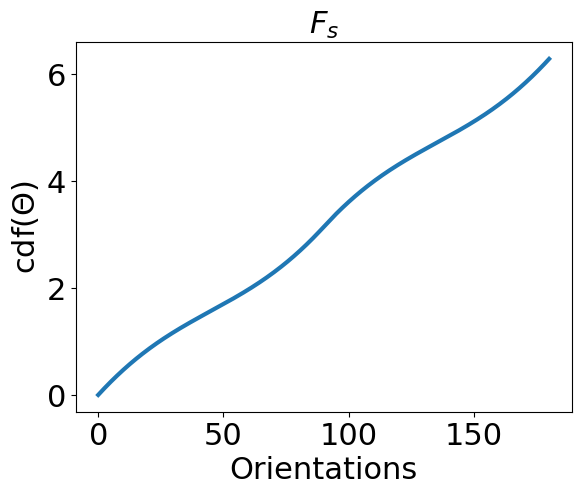

In [4]:
plt.plot(model.stim_ori_grid*90./np.pi, tools.cdf_ori(model.stim_ori_grid, model.stim_ori_grid))
# plt.plot(tools.value_function_ori(model.stim_ori_grid, "cdf_prior"))

plt.ylabel("cdf($\Theta$)")
plt.xlabel("Orientations")
plt.title("$F_s$", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

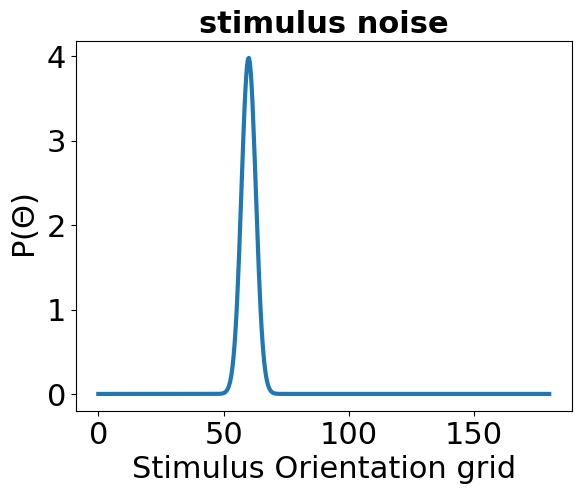

In [5]:
plt.plot(model.stim_ori_grid*90./np.pi, tools.stimulus_ori_noise(60./90.*np.pi, 100, model.stim_ori_grid))

plt.ylabel("P($\Theta$)")
plt.xlabel("Stimulus Orientation grid")
plt.title("stimulus noise", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

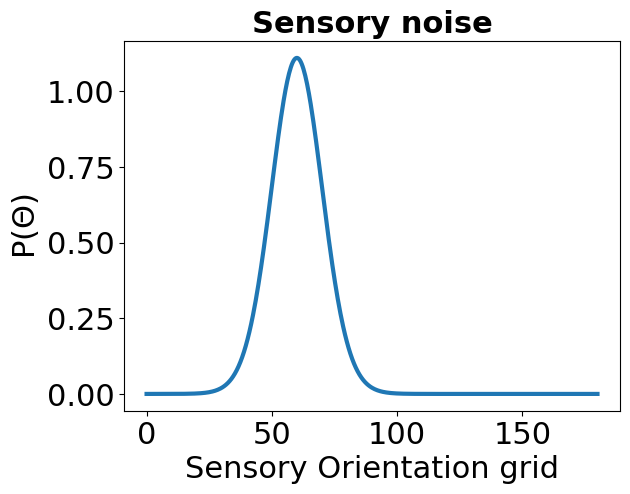

In [6]:
plt.plot(model.rep_ori_grid*90./np.pi, tools.sensory_ori_noise(60./90.*np.pi, 8, model.rep_ori_grid))

plt.ylabel("P($\Theta$)")
plt.xlabel("Sensory Orientation grid")
plt.title("Sensory noise", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

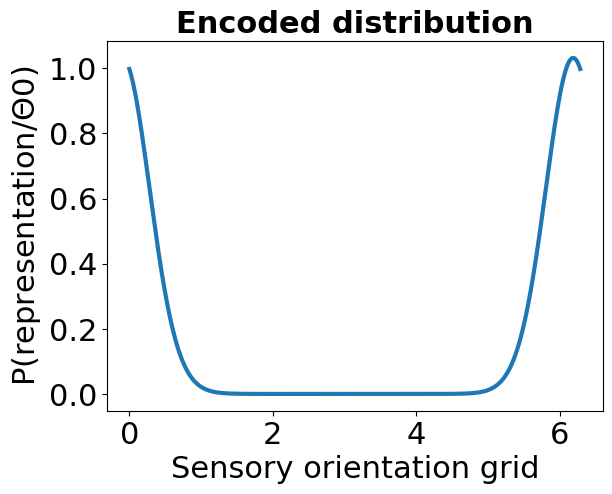

In [7]:

p_m_given_theta0, p_m_given_theta = model.MI_efficient_encoding(178./90.*np.pi, 100, 8)

# p_m_given_theta[np.argsort(tools.value_function_ori(tools.stim_ori_grid, type))]

plt.plot(model.rep_ori_grid, p_m_given_theta0[0])

# plt.plot(model.rep_val_grid, p_m_given_val[400])

plt.ylabel("P(representation/$\Theta0$)")
plt.xlabel("Sensory orientation grid")
plt.title("Encoded distribution", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")


179.99930811439953


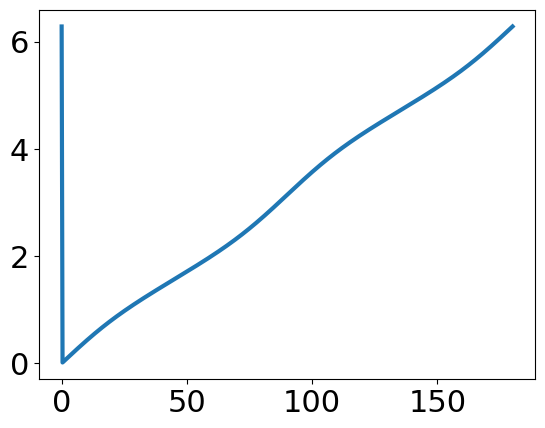

In [7]:
kappa_s = 10000
kappa_r = 4
theta_estimates = model.subject_theta_estimate(kappa_s, kappa_r, p_per=8, normalize = False)

plt.plot(model.rep_ori_grid*90/np.pi, theta_estimates)
# plt.plot(model.stim_ori_grid*90./np.pi, tools.cdf_ori(model.stim_ori_grid, model.stim_ori_grid))
print(max(theta_estimates*90/np.pi))


Text(0.5, 1.0, 'Wei : Bias -\n Varying stimulus noise')

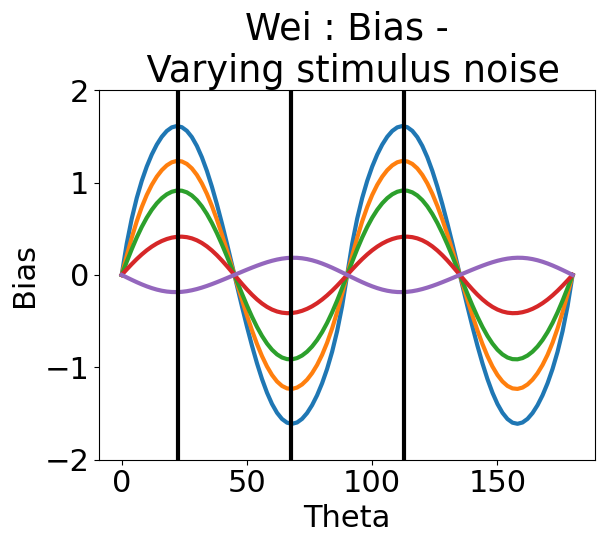

In [ ]:
y=wei.x
y = np.append(y,2*np.pi)

ppp1 = wei.bias(kappa = 8, kappa_s = 10000)
ppp1[0]=ppp1[0]-2*np.pi
ppp1 = np.append(ppp1,ppp1[0])

ppp2 = wei.bias(kappa = 8, kappa_s = 32)
# ppp2[0]=ppp2[0]-2*np.pi
ppp2 = np.append(ppp2,ppp2[0])
ppp3 = wei.bias(kappa = 8, kappa_s = 16)
# ppp3[0]=ppp3[0]-2*np.pi
ppp3 = np.append(ppp3,ppp3[0])
ppp4 = wei.bias(kappa = 8, kappa_s = 8)
# ppp4[0]=ppp4[0]-2*np.pi
ppp4 = np.append(ppp4,ppp4[0])
ppp5 = wei.bias(kappa = 8, kappa_s = 4)
# ppp5[0]=ppp5[0]-2*np.pi
ppp5 = np.append(ppp5,ppp5[0])

# ppp1
plt.plot(90*y/np.pi,90*ppp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*ppp2/np.pi)
plt.plot(90*y/np.pi,90*ppp3/np.pi)
plt.plot(90*y/np.pi,90*ppp4/np.pi)
plt.plot(90*y/np.pi,90*ppp5/np.pi)


plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')

plt.xlabel('Theta')
plt.ylabel('Bias')
plt.title('Wei : Bias -\n Varying stimulus noise')

Text(0, 0.5, 'bias')

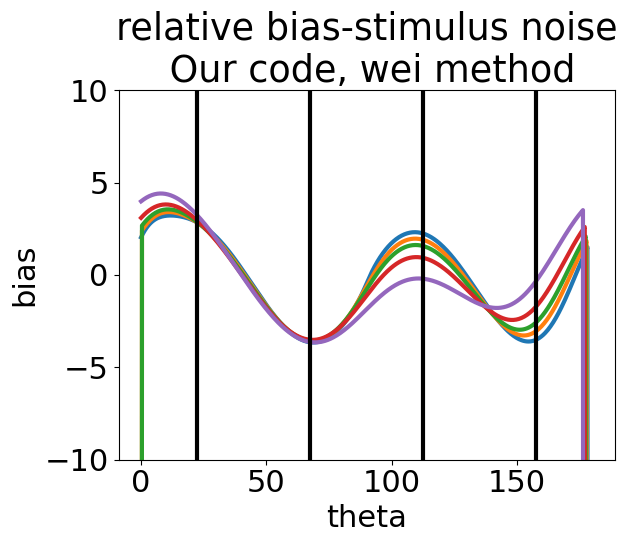

In [ ]:

y = model.stim_ori_grid

theta0 = np.linspace(0.0, 2.*np.pi, 500) #0.8
kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4


normalize = False

kappa_r = 8

pp1 = model.wei_bias(theta0, kappa1, kappa_r, normalize)
pp1[0]=pp1[0]#-2*np.pi


pp2 = model.wei_bias(theta0, kappa2, kappa_r, normalize)
pp2[0]=pp2[0]-2*np.pi


pp3 = model.wei_bias(theta0, kappa3, kappa_r, normalize)
pp3[0]=pp3[0]-2*np.pi

pp4 = model.wei_bias(theta0, kappa4, kappa_r, normalize)
pp4[0]=pp4[0]#-2*np.pi

pp5 = model.wei_bias(theta0, kappa5, kappa_r, normalize)
pp5[0]=pp5[0]#-2*np.pi

# ppp1
plt.plot(90*y/np.pi,90*pp1/np.pi)
plt.ylim(-10,10)
plt.plot(90*y/np.pi,90*pp2/np.pi)
plt.plot(90*y/np.pi,90*pp3/np.pi)
plt.plot(90*y/np.pi,90*pp4/np.pi)
plt.plot(90*y/np.pi,90*pp5/np.pi)


plt.title('relative bias-stimulus noise\n Our code, wei method')

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')

plt.xlabel('theta')
plt.ylabel('bias')

Text(0, 0.5, 'Mean bias')

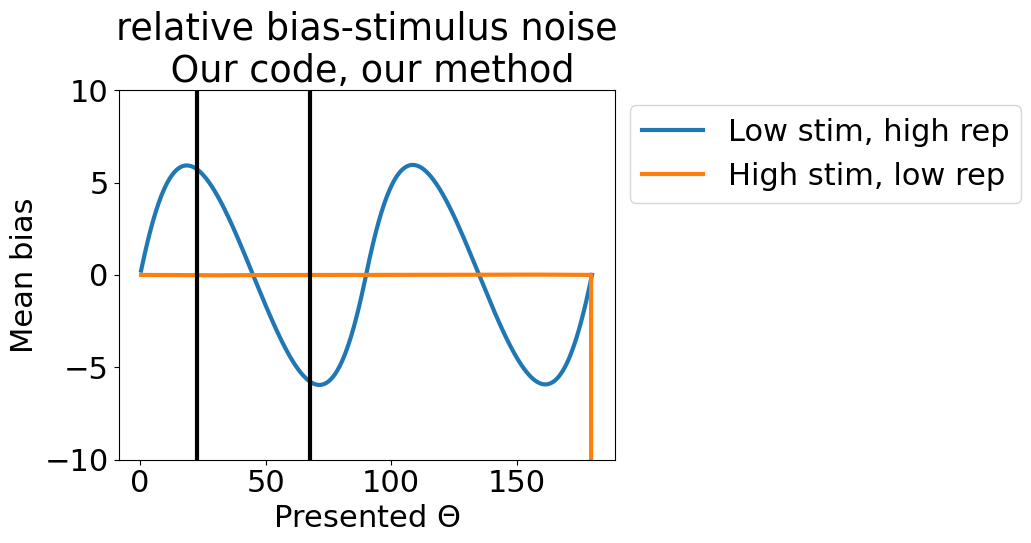

In [2]:
theta0 = model.stim_ori_grid #0.8
# theta0 = theta0[:-1]
kappa1 = 10000
kappa2 = 8


E_theta_given_theta0 = model.experimenter_expected_thetahat(theta0, kappa1, kappa2, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, high rep")



E_theta_given_theta0 = model.experimenter_expected_thetahat(theta0, kappa2, kappa1, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "High stim, low rep")



plt.ylim(-10.0,10.0)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
# plt.axvline(112.5, c='k')
# plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('relative bias-stimulus noise\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

0.9807875243002958
1.0


KeyboardInterrupt: 

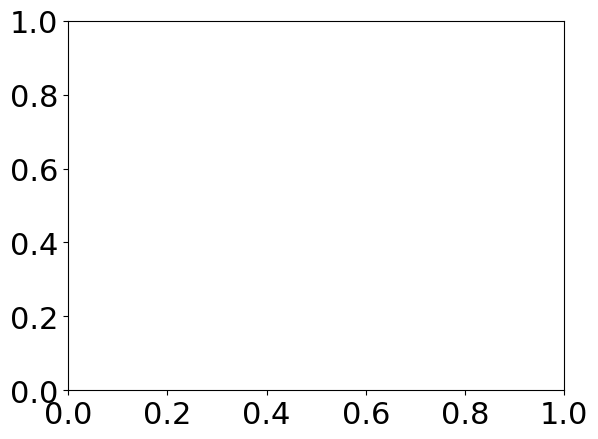

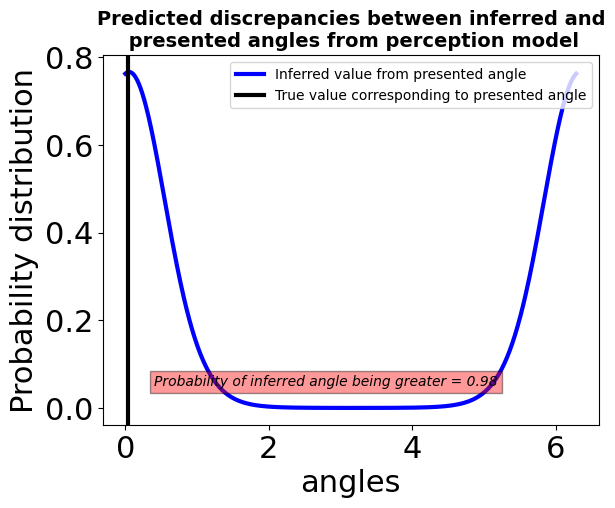

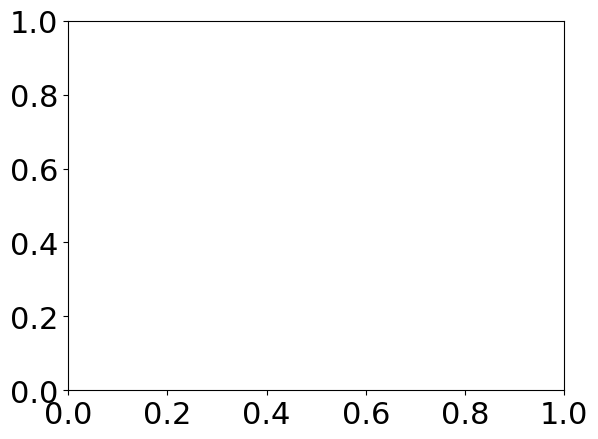

In [3]:
## Try to find median for angles tomorrow
kappa_s = 10000
kappa_r = 4

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["b", "r", "g", "m", "y", "k"]

fig = plt.figure()
ax1 = fig.add_subplot(111)

safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

prob_greater_perception = np.zeros(len(safe_angles))
plot_lines = []

for i in range(len(safe_angles)):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    prob_dist = model.experimenter_theta_obs(safe_angles[i], kappa_s, kappa_r, p_per = 0)

    prob = tools.dist_greater(tools.stim_ori_grid, prob_dist, safe_angles[i])
    prob_greater_perception[i] = prob

    print(prob)
    print(safe_angles[i]*90/np.pi)

    labels = ["Inferred value from presented angle", "True value corresponding to presented angle"]

    l1, = ax2.plot(tools.stim_ori_grid, prob_dist[0], color = "b", label=labels[0])
    l2 = ax2.axvline(x = safe_angles[i], color = "k", label=labels[1])
    plot_lines.append([l1, l2])
    # plt.ylim(bottom=0, top=0.3)
    text = "Probability of inferred angle being greater = "+str(round(prob, 2))
    ax2.set_xlabel("angles")
    ax2.set_ylabel("Probability distribution")
    if type == "scaled_cdf":
        ax2.set_title("Predicted discrepancies between inferred and\n presented angles from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})
    else:
        ax2.set_title("Predicted discrepancies between inferred and\n presented angles from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})


    ax2.text(0.4,0.05, text, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)
    ax2.legend(handles=[l1, l2], labels=labels,  fontsize=10, loc = "upper right")
    fig2.savefig(f'/Users/sbedi/Downloads/perceptAngle%02d.png'%i,dpi=300, bbox_inches = "tight")

    # plt.show()

ax1.plot(safe_angles*90./np.pi, prob_greater_perception, color="b", marker = "x", label=type)
# ax3 = ax1.twiny()
# ax3.plot(safe_angles, np.ones(len(safe_angles))/1.3, alpha=0.0)

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
# ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:
#     ax1.set_title("value mapping - " + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})

noiseText = "stimulus noise ($\kappa_s$) = "+str(kappa_s)+ ";\n stim encoding noise ($\kappa_r) = $"+str(kappa_r)
ax1.text(0.4,0.3, noiseText, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)


ax1.axhline(0.5, c='k', ls='--')
ax1.set_ylabel("Probability")

# ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
fig.savefig(f'/Users/sbedi/Downloads/perModelSingleOption'+str(i)+'.png',dpi=300, bbox_inches = "tight")
fig.show()

## Gifs

In [ ]:
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, kappa_s=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

# Back to simulations now of value

179.9996463604549

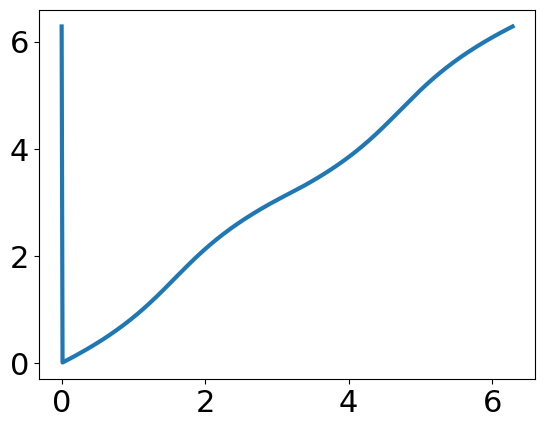

In [12]:

type = "scaled_cdf"
theta0 = 25./90.*np.pi
kappa_s = 10000
kappa_r = 10000
theta_estimates = model.subject_theta_estimate(kappa_s, kappa_r, p_per=8)

plt.plot(tools.rep_ori_grid, theta_estimates)
max(theta_estimates*90/np.pi)

35.0
49.68000000000001
p_chose_risky =  [[0.37137147]]


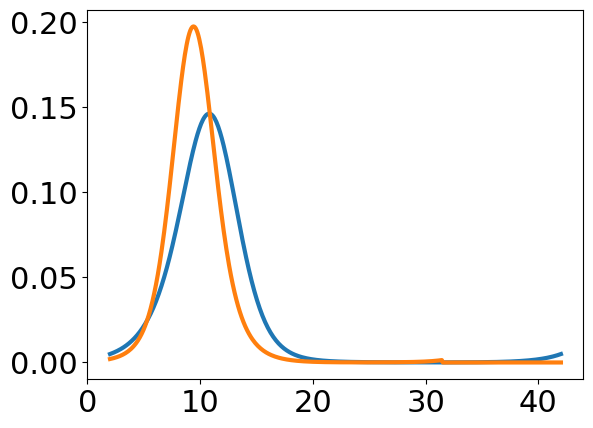

In [4]:
kappa_s = 10000
kappa_r = 4

theta0 = 35.*np.pi/90.
type = "linearIncrease"
risk_prob = 0.75
theta1 = float(tools.inverse_monotonic(tools.value_function_ori(theta0, type)/risk_prob, type))
# theta1 is chosen such that it corresponds to val;ue of theta0 in risky domain dso distributions should lie on each other

# plt.plot(model.bayesian_decoding(theta0, kappa_s, kappa_r)[0])

print(theta0*90/np.pi)
print(theta1*90/np.pi)


safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type, p_per = 8)
rr, risky_prob = model.risky_value_dist(theta1, kappa_s, kappa_r, risk_prob, type, p_per = 8)

plt.plot(safe_value, safe_prob[0])
plt.plot(safe_value, risky_prob[0])

print("p_chose_risky = ", tools.diff_dist(safe_value, risky_prob, safe_prob))



In [ ]:
(np.angle(np.dot(np.exp(1j*((safe_value-2)/40*2*np.pi)), np.squeeze(safe_prob)))%(2*np.pi))

3.141592653589793

In [ ]:
mean_safe = (np.angle(np.dot(np.exp(1j*((safe_value-2)/40*2*np.pi)), np.squeeze(safe_prob)))%(2*np.pi))/2/np.pi*40 + 2
mean_safe


22.0

# Value biases already

0.8867187919819546

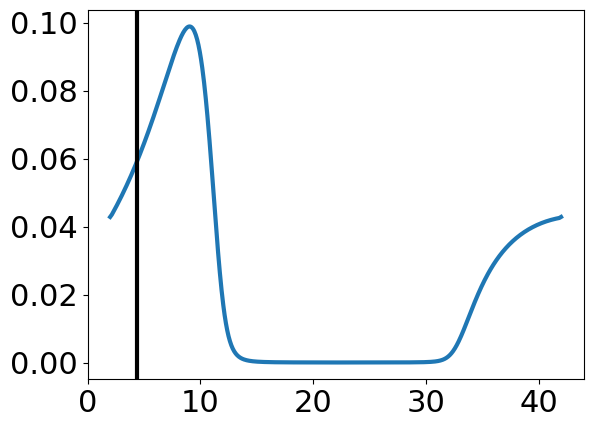

In [ ]:

theta0 = 6/90.*np.pi
kappa_s = 10000
kappa_r = 4 # The division is with teh analog of kappa

risk_prob = 0.75
type = "scaled_cdf"
val0 = tools.value_function_ori(theta0, type)

safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type, p_per = 8)


plt.plot(safe_value, safe_prob[0])
plt.axvline(x = val0, color = "k")

tools.dist_greater(safe_value, safe_prob, val0)

# plt.xlabel("Value")
# plt.ylabel("P(V)")
# plt.title("Value mapping context 1", size = 22,fontweight="bold")

0.8962061983944715
1.0
0.6323930190728413
4.06896551724138


KeyboardInterrupt: 

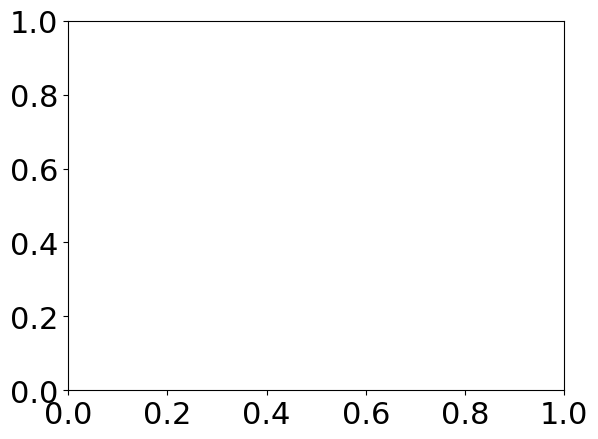

In [ ]:
type = "linearIncrease"

kappa_s = 10000
kappa_r = [64, 16, 4]

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["b", "r", "g", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, len(kappa_r))
alphaList = alphaList[np.argsort(kappa_r)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)


safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

for k, kappa_r in enumerate(kappa_r):
    prob_greater_perception = np.zeros(len(safe_angles))
    safe_Val_presented = tools.value_function_ori(safe_angles, type)
    plot_lines = []

    for i in range(len(safe_angles)):
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, kappa_r, type, p_per = 8)

        prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
        prob_greater_perception[i] = prob

        print(prob)
        print(safe_angles[i]*90/np.pi)

        if k == 2:
            fig2 = plt.figure()
            ax2 = fig2.add_subplot(111)
            labels = ["Inferred value from presented angle", "True value corresponding to presented angle"]

            l1, = ax2.plot(safe_value, safe_prob[0], color = "b", label=labels[0])
            l2 = ax2.axvline(x = safe_Val_presented[i], color = "k", label=labels[1])
            plot_lines.append([l1, l2])
            # plt.ylim(bottom=0, top=0.3)
            text = "Probability of inferred value being greater = "+str(round(prob, 2))
            ax2.set_xlabel("Values")
            ax2.set_ylabel("Probability distribution")
            if type == "scaled_cdf":
                ax2.set_title("Predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})
            else:
                ax2.set_title("Predicted discrepancies between\n inferred and presented value from perception model", fontdict={"fontsize": 14, "fontweight": "bold"})

            # ax2.ylim(0.4, 0.6)
            ax2.text(0.4,0.05, text, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)
            ax2.legend(handles=[l1, l2], labels=labels,  fontsize=10, loc = "upper right")
            fig2.savefig(f'/Users/sbedi/Downloads/percept%02d.png'%i,dpi=300, bbox_inches = "tight")
        
        # plt.show()

    # ax1.set_ylim(0.4, 0.6)
    ax1.plot(safe_angles*90./np.pi, prob_greater_perception, color=colorList[2], alpha = alphaList[k], label="Stim encoding noise - "+str(round(kappa_r)))
    ax3 = ax1.twiny()
    ax3.plot(safe_Val_presented, np.ones(len(safe_Val_presented))/1.3, alpha=0.0)

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:
ax1.set_title(type+" type; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})

# noiseText = "stimulus noise ($\kappa_s$) = "+str(kappa_s)+ ";\n val encoding noise ($\kappa_r) = $"+str(kappa_r)
# ax1.text(0.4,0.3, noiseText, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)


ax1.axhline(0.5, c='k', ls='--')
ax1.set_ylabel("Probability")

ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
fig.savefig(f'/Users/sbedi/Downloads/perModelSingleOption'+str(i)+'.png',dpi=300, bbox_inches = "tight")
fig.show()

0.8963284408701911
1.0
0.6210616456984763
4.06896551724138
0.638504513932224
7.137931034482759
0.6028782338679759
10.206896551724139
0.6540737370927401
13.27586206896552
0.6252180108967003
16.344827586206904
0.6581565706596156
19.41379310344828
0.6339420020465767
22.482758620689662
0.652989060449331
25.551724137931043
0.6281370815317989
28.62068965517242
0.5989264985491527
31.689655172413804
0.60389397935626
34.75862068965518
0.5603841653258055
37.82758620689656
0.561979166515408
40.896551724137936
0.5096357062795664
43.96551724137932
0.5110230420976234
47.0344827586207
0.45672071949414417
50.10344827586208
0.46338207406130094
53.17241379310346
0.413097379889693
56.24137931034484
0.4292372055645082
59.31034482758622
0.3870544078713203
62.3793103448276
0.41520131654539405
65.44827586206897
0.3802328638361756
68.51724137931036
0.41920917490411347
71.58620689655173
0.388329589502576
74.65517241379312
0.43455786054680734
77.72413793103449
0.40904237327882675
80.79310344827587
0.46249178928

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_20047/2419234507.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


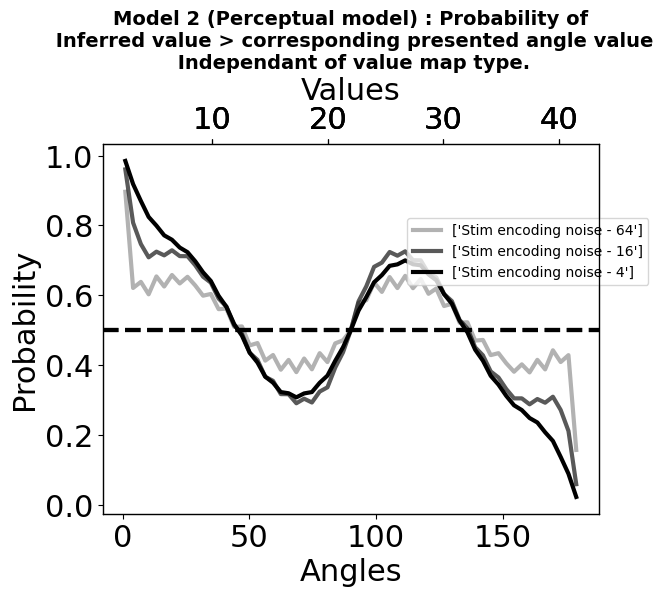

In [2]:
# Effect of types on value inference process

types = ["scaled_cdf"]

kappa_s = 100000
kappa_rl = [64, 16, 4]

end = int(tools.experimentRange[-3:])-1
start = int(tools.experimentRange[0:2])+1
end = end/90.*np.pi
start = start/90.*np.pi
    
signs = ["x", "o", ".", "v"] 
colorList = ["b", "r", "g", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, len(kappa_rl))
# alphaList = np.array((0.0, 0.0, 1))
alphaList = alphaList[np.argsort(kappa_rl)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)


safe_angles = np.linspace(start, end, int((start*90/np.pi+end*90/np.pi-1)/3))

for j, type in enumerate(types):
    for k, kappa_r in enumerate(kappa_rl):
        prob_greater_perception = np.zeros(len(safe_angles))
        safe_Val_presented = tools.value_function_ori(safe_angles, type)
        plot_lines = []

        for i in range(len(safe_angles)):
            safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, kappa_r, type, p_per = 8)

            prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
            prob_greater_perception[i] = prob

            print(prob)
            print(safe_angles[i]*90/np.pi)

            # plt.show()

        # ax1.set_ylim(0.4, 0.6)

        ax1.plot(safe_angles*90./np.pi, prob_greater_perception, color=colorList[j], alpha = alphaList[k], label=["Stim encoding noise - "+str(round(kappa_r))])
        ax3 = ax1.twiny()
        ax3.plot(safe_Val_presented, np.ones(len(safe_Val_presented))/1.3, alpha=0.0)

ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax3.set_xlabel("Values")
# if type == "scaled_cdf":
#     ax1.set_title("value mapping - "+ str(tools.scaling) + type+"; Perceptual model : Probability of\n Inferred value > corresponding presented angle value", fontdict={"fontsize": 14, "fontweight": "bold"})
# else:
ax1.set_title("Model 2 (Perceptual model) : Probability of\n Inferred value > corresponding presented angle value\n Independant of value map type.", fontdict={"fontsize": 14, "fontweight": "bold"})

# noiseText = "stimulus noise ($\kappa_s$) = "+str(kappa_s)+ ";\n val encoding noise ($\kappa_r) = $"+str(kappa_r)
# ax1.text(0.4,0.3, noiseText, style='italic', bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 3},  fontsize=10)


ax1.axhline(0.5, c='k', ls='--')
ax1.set_ylabel("Probability")

ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
fig.savefig(f'/Users/sbedi/Downloads/perModelSingleOption'+str(i)+'.png',dpi=300, bbox_inches = "tight")
fig.show()

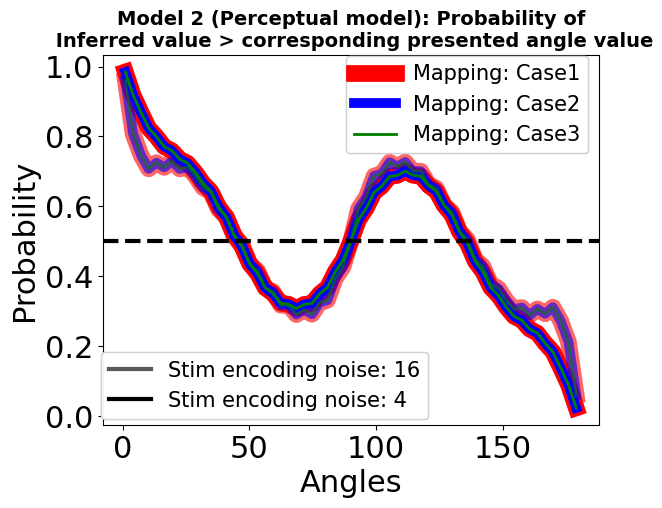

In [12]:
import numpy as np
import matplotlib.pyplot as plt

types = ["scaled_cdf", "linearIncrease", "scaled_inverse_cdf"]
kappa_s = 1000000
kappa_rl = [16, 4]

end = int(tools.experimentRange[-3:]) - 1
start = int(tools.experimentRange[0:2]) + 1
end = end / 90. * np.pi
start = start / 90. * np.pi

lw = [12, 7, 2]
colorList = ["r", "b", "g", "m", "y", "k"]
alphaList = np.linspace(0.6, 1.0, len(kappa_rl))

fig = plt.figure()
ax1 = fig.add_subplot(111)

safe_angles = np.linspace(start, end, int((start * 90 / np.pi + end * 90 / np.pi - 1) / 3))

# Plot lines for the type legend
type_lines = []
line_styles = ["-", "--", ":"]
for j, type in enumerate(types):
    for k, sigma_rep in enumerate(kappa_rl):
        prob_greater_perception = np.zeros(len(safe_angles))
        safe_Val_presented = tools.value_function_ori(safe_angles, type)

        for i in range(len(safe_angles)):
            safe_value, safe_prob = model.safe_value_dist(safe_angles[i], kappa_s, sigma_rep, type, p_per=8)
            prob = tools.dist_greater(safe_value, safe_prob, safe_Val_presented[i])
            prob_greater_perception[i] = prob

        # Plot lines for each sigma_rep for each type
        line = ax1.plot(
            safe_angles * 90. / np.pi,
            prob_greater_perception,
            label=f"type - Case " + str(j) if k == 1 else None,
            color=colorList[j],
            linewidth = lw[j],
            alpha=alphaList[k]
        )
    if line:
        type_lines.append(line[0])

# Create the type legend
ax1.axhline(0.5, c='k', ls='--')
ax1.set_xlabel("Angles")
ax1.set_title(
    "Model 2 (Perceptual model): Probability of\n Inferred value > corresponding presented angle value",
    fontdict={"fontsize": 14, "fontweight": "bold"}
)
ax1.set_ylabel("Probability")

# Plot lines for the alpha legend
alpha_lines = []
for k, sigma_rep in enumerate(kappa_rl):
    # Dummy plot lines for the alpha legend
    line = ax1.plot([], [], alpha=alphaList[k], label=f"Stim encoding noise - {round(sigma_rep, 2)}", color='k')
    alpha_lines.append(line[0])

# Create the first legend for mapping types
mapping_labels = ["Mapping: Case1", "Mapping: Case2", "Mapping: Case3"]
mapping_legend = fig.legend(type_lines, mapping_labels, loc="upper right", bbox_to_anchor=(0.9, 0.9), fontsize=15)

# Create the second legend for value encoding noises
noise_labels = [f"Stim encoding noise: {round(sigma_rep, 2)}" for sigma_rep in kappa_rl]
noise_legend = fig.legend(alpha_lines, noise_labels, loc="lower right", bbox_to_anchor=(0.65, 0.1), fontsize=15)

# Add the legends to the figure
fig.gca().add_artist(mapping_legend)
fig.gca().add_artist(noise_legend)

# Show the figure
plt.show()


In [9]:
# Create the second legend for value encoding noises

# Create the first legend for mapping types
mapping_labels = ["Mapping: Case1", "Mapping: Case2", "Mapping: Case3"]
mapping_legend = fig.legend(type_lines, mapping_labels, loc="upper right", bbox_to_anchor=(0.9, 0.9), fontsize=15)

noise_labels = [f"Stim encoding noise: {round(sigma_rep, 2)}" for sigma_rep in kappa_rl]
noise_legend = fig.legend(alpha_lines, noise_labels, loc="lower right", bbox_to_anchor=(0.65, 0.1), fontsize=15)

# Add the legends to the figure
fig.gca().add_artist(mapping_legend)
fig.gca().add_artist(noise_legend)

# Show the figure
plt.show()

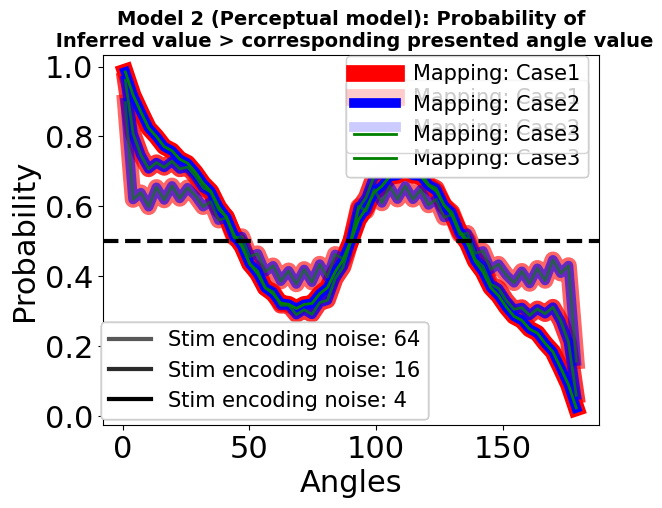

In [10]:
fig

In [45]:
from matplotlib.lines import Line2D

legend_line = Line2D([], [], color='black', linestyle='-', marker='_')
ax1.legend([legend_line], ["Probability is independent of value map type"], loc='upper right', prop={'size': 10})

kappa_labels = ["Stim encoding noise $\kappa$ = 64", "Stim encoding noise $\kappa$ = 16", "Stim encoding noise $\kappa$ = 4"]
transparencies = np.linspace(0.3, 1.0, len(kappa_rl))

for i, kappa_r in enumerate(kappa_rl):
    ax1.scatter([], [], color='black', alpha=transparencies[i], label=kappa_labels[i], marker='o')

second_legend = ax1.legend(scatterpoints=1, loc='lower left', frameon=False, prop={'size': 10})
ax1.add_artist(second_legend)


ax1.set_title("Model 2 (Perceptual model) : Probability of\n Inferred value > corresponding presented angle value.", fontdict={"fontsize": 14, "fontweight": "bold"})


Text(0.5, 1.0, 'Model 2 (Perceptual model) : Probability of\n Inferred value > corresponding presented angle value.')

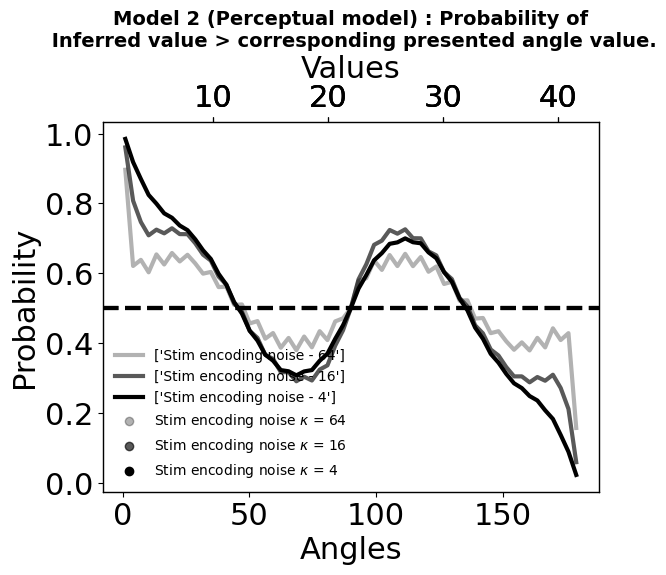

In [47]:
for item in ax1.texts:
    item.remove()
ax1.get_legend().remove()

fig

# Uncovering risk attitudes

[ 80.          80.65656566  81.31313131  81.96969697  82.62626263
  83.28282828  83.93939394  84.5959596   85.25252525  85.90909091
  86.56565657  87.22222222  87.87878788  88.53535354  89.19191919
  89.84848485  90.50505051  91.16161616  91.81818182  92.47474747
  93.13131313  93.78787879  94.44444444  95.1010101   95.75757576
  96.41414141  97.07070707  97.72727273  98.38383838  99.04040404
  99.6969697  100.35353535 101.01010101 101.66666667 102.32323232
 102.97979798 103.63636364 104.29292929 104.94949495 105.60606061
 106.26262626 106.91919192 107.57575758 108.23232323 108.88888889
 109.54545455 110.2020202  110.85858586 111.51515152 112.17171717
 112.82828283 113.48484848 114.14141414 114.7979798  115.45454545
 116.11111111 116.76767677 117.42424242 118.08080808 118.73737374
 119.39393939 120.05050505 120.70707071 121.36363636 122.02020202
 122.67676768 123.33333333 123.98989899 124.64646465 125.3030303
 125.95959596 126.61616162 127.27272727 127.92929293 128.58585859
 129.242424

(0.8190527026481058, 0.29756105321407317)

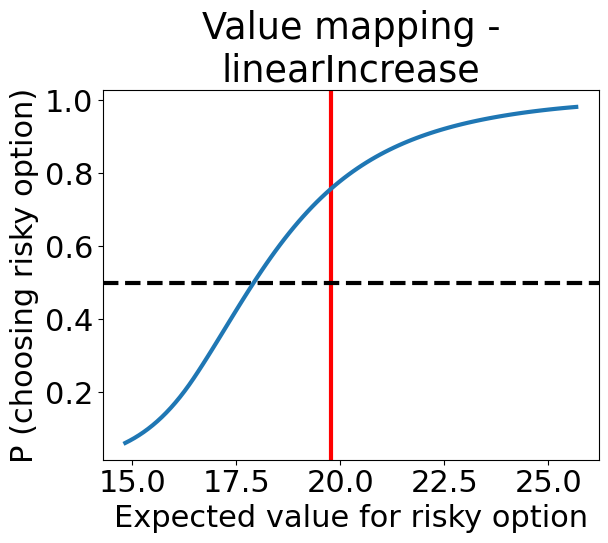

In [2]:
# setting parameters
experimentEffects = tools.experimentRange#"00to45"
risk_prob = 0.75
type = "linearIncrease" 

stim_noise = 10000
rep_noise = 8
start = 80/90*np.pi

# Getting all the values from actual transformation
interval = 65/90.*np.pi
if (type=="linearDecrease"):
    rangeOri = np.linspace(start, (start-interval), 100)
else:
    rangeOri = np.linspace(start, (start+interval), 100)

val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_noise, type, p_per = 8)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type, p_per = 8)

print(rangeOri*90/np.pi)

# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)



# Comaparing two models - Both safe and risky option with same noise type

In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

import riskSingleObserverPercept as model
import WeiPerception as wei
import tools as tools

In [2]:
def rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    slope = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri*90/np.pi)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # print("safeval - ", safeVal, "range val - ", val_range)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_noise , type, p_per = 8)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type, p_per = 8)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        print(p_chose_risky[0,::2])
        rnp[i], slope[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp, slope



safe angle -  1.0
[0.24451003 0.16882955 0.12048729 0.10329562 0.11586834 0.15348172
 0.20956346 0.27669695 0.34750998 0.41558408]
0.6254603978447081
safe angle -  4.085128205128205
[0.09731861 0.10082591 0.13228087 0.18623006 0.25737327 0.34023499
 0.4290777  0.51825349 0.60278193 0.67886873]
0.7370611215248033
safe angle -  7.170256410256411
[0.07978907 0.11681527 0.16622901 0.2269712  0.29726995 0.3745109
 0.4554528  0.53659825 0.61462354 0.68676671]
0.7528231938596295
safe angle -  10.255384615384614
[0.08997481 0.13123217 0.18291247 0.24437752 0.31402502 0.38942215
 0.46761812 0.54550029 0.62018345 0.68927876]
0.751572607313064
safe angle -  13.34051282051282
[0.0967857  0.13843191 0.18969994 0.24989731 0.31748695 0.39024094
 0.46550337 0.54049035 0.61261604 0.67972869]
0.7493673611399576
safe angle -  16.425641025641028
[0.10005614 0.14102201 0.19091943 0.24905086 0.3139938  0.38374427
 0.45593878 0.52810895 0.59793539 0.66345644]
0.7471177186364573
safe angle -  19.5107692307692

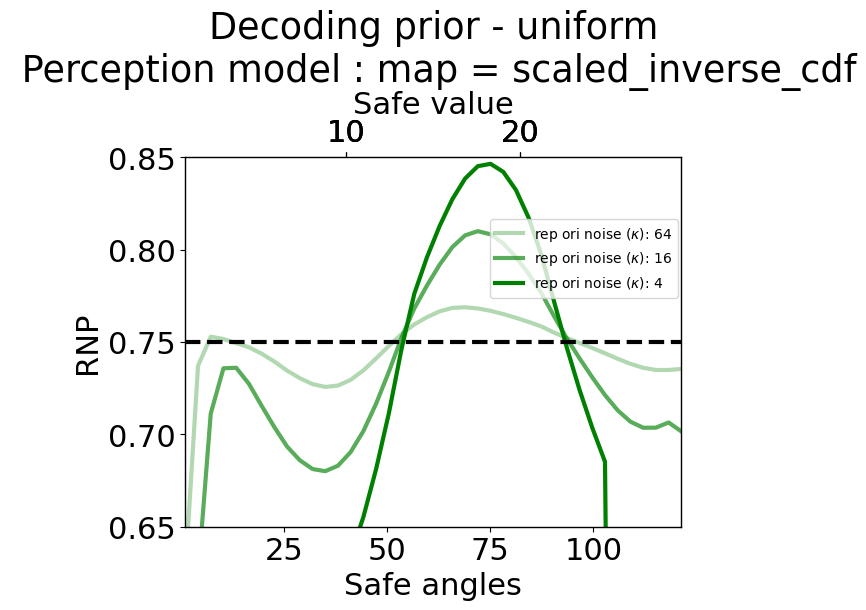

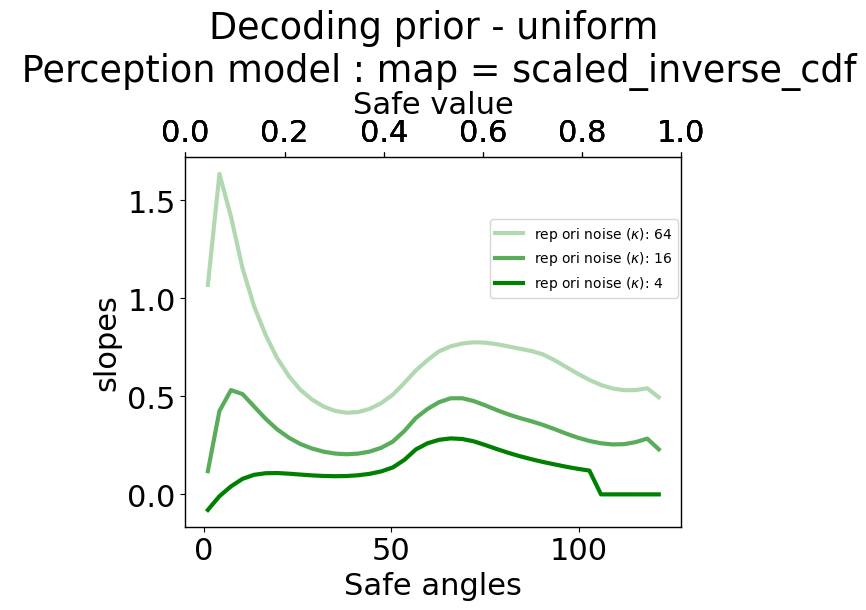

In [10]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["scaled_inverse_cdf"]
# type = "curved_cdf_prior"

for type in types:

    # changeable parameters
    stim_list = [10000]
    rep_list = [64, 16, 4]
    # High stim noise
    # stim_list = [64, 16, 8, 4]
    # rep_list = [128]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    fig1 = plt.figure()
    axa1 = fig1.add_subplot(111)

    alphaList = np.linspace(0.3, 1.0, len(rep_list))
    alphaList = alphaList[np.argsort(rep_list)][::-1]
    i = 0
    for stim_noise in stim_list:
        for rep_noise in rep_list:

            safe_angles, safeVals, rnp, slope = rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects)
            ax1.set_ylim(0.65, 0.85)
            ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

            text = "rep ori noise ($\kappa$): "+str(rep_noise)
            ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color='green', label = text, alpha =  alphaList[i])

            ax2 = ax1.twiny()
            if (type == "linearDecrease"):
                ax2.set_xlim(max(safeVals), min(safe_angles))

            ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

            axa1.plot(safe_angles[:]*90./np.pi, slope[:], color='green', label = text, alpha =  alphaList[i])
            axa2 = axa1.twiny()
            i = i+1

    ax1.axhline(risk_prob, c='k', ls='--')
    ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")
    
    axa1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
    axa2.set_xlabel("Safe value")
    axa1.set_xlabel("Safe angles")
    axa1.set_ylabel("slopes")
    if type == "scaled_cdf":
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : map = " + type+str(tools.scaling)) 
        axa1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : map = " + type+str(tools.scaling)) 
        fig.savefig("/Users/sbedi/Downloads/"+"RNP-perception-"+str(tools.scaling)+type+".png",dpi=300, bbox_inches = "tight")
        fig1.savefig("/Users/sbedi/Downloads/"+"Slope-perception-"+str(tools.scaling)+type+".png",dpi=300, bbox_inches = "tight")
    else:
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : map = " + type) 
        axa1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : map = " + type) 

        fig.savefig("/Users/sbedi/Downloads/"+"RNP-perception-"+type+".png",dpi=300, bbox_inches = "tight")
        fig1.savefig("/Users/sbedi/Downloads/"+"Slope-perception-"+type+".png",dpi=300, bbox_inches = "tight")
        

safe angle -  1.0
[0.31764404 0.30360156 0.29753636 0.28998828 0.28380094 0.28210869
 0.28493331 0.29152422 0.29790927 0.30393548]
-0.07707196815054336
safe angle -  4.125882352941177
[0.24374756 0.26351605 0.29815862 0.32360942 0.373445   0.40325012
 0.45618946 0.4996123  0.53958005 0.59106897]
0.7192061898079212
safe angle -  7.251764705882353
[0.1607224  0.20368844 0.26012473 0.30777153 0.36264871 0.4352093
 0.48859949 0.54281576 0.61361847 0.66177502]
0.7461853735507988
safe angle -  10.377647058823527
[0.10044102 0.14057847 0.1905473  0.26216072 0.3284546  0.39563669
 0.4680711  0.55193838 0.61685307 0.67587912]
0.7399920750428803
safe angle -  13.503529411764706
[0.06073022 0.10069906 0.16173919 0.22562771 0.30990772 0.4032557
 0.48204365 0.57367342 0.65370518 0.71804311]
0.7395340189107444
safe angle -  16.629411764705882
[0.03366501 0.07387112 0.1307387  0.2108342  0.31144421 0.40700248
 0.51489    0.61477705 0.69459752 0.77167893]
0.7385179164366137
safe angle -  19.7552941176

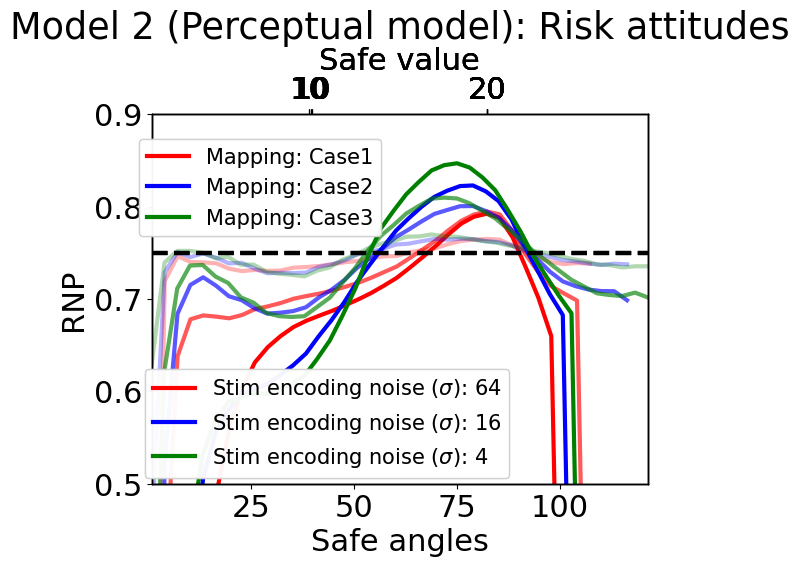

In [9]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["scaled_cdf", "linearIncrease", "scaled_inverse_cdf"]
# type = "curved_cdf_prior"

signs = ["x", "o", ".", "v"] 
colorList = ["r", "b", "g", "m", "y", "k"]
alphaList = np.linspace(0.3, 1.0, 3)
# alphaList = alphaList[np.argsort(sigma_rep)][::-1]

fig = plt.figure()
ax1 = fig.add_subplot(111)

j = -1
type_lines = []
for type in types:
    j = j+1
    # changeable parameters
    stim_noise = 100000
    rep_list = [64, 16, 4]

    i = 0
    for rep_noise in rep_list:

        safe_angles, safeVals, rnp, slope = rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects)

        ax1.set_ylim(0.5, 0.9)
        ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

        text = "rep stimulus noise ($\sigma$): "+str(round(rep_noise,2))
        line = ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color = colorList[j], alpha = alphaList[i], label = text)

        ax2 = ax1.twiny()
        if (type=="linearDecrease"):
            ax2.set_xlim(max(safeVals), min(safeVals))

        ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

        i = i+1
    if line:
        type_lines.append(line[0])

    ax1.axhline(risk_prob, c='k', ls='--')

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")

# Create the first legend for mapping types
mapping_labels = ["Mapping: Case1", "Mapping: Case2", "Mapping: Case3"]
mapping_legend = fig.legend(type_lines, mapping_labels, loc="upper right", bbox_to_anchor=(0.5, 0.85), fontsize=15)

# Create the second legend for value encoding noises
noise_labels = [f"Stim encoding noise ($\sigma$): {round(sigma_rep, 2)}" for sigma_rep in rep_list]
noise_legend = fig.legend(type_lines, noise_labels, loc="lower right", bbox_to_anchor=(0.7, 0.1), fontsize=15)

ax1.set_title("Model 2 (Perceptual model): Risk attitudes")

# Add the legends to the figure
fig.gca().add_artist(mapping_legend)
fig.gca().add_artist(noise_legend)




In [7]:
# Create the first legend for mapping types
mapping_labels = ["Mapping: Case1", "Mapping: Case2", "Mapping: Case3"]
mapping_legend = fig.legend(type_lines, mapping_labels, loc="upper right", bbox_to_anchor=(0.5, 0.85), fontsize=15)

# Create the second legend for value encoding noises
noise_labels = [f"Stim encoding noise ($\sigma$): {round(sigma_rep, 2)}" for sigma_rep in rep_list]
noise_legend = fig.legend(type_lines, noise_labels, loc="lower right", bbox_to_anchor=(0.7, 0.1), fontsize=15)

ax1.set_title("Model 2 (Perceptual model): Risk attitudes")

# Add the legends to the figure
fig.gca().add_artist(mapping_legend)
fig.gca().add_artist(noise_legend)


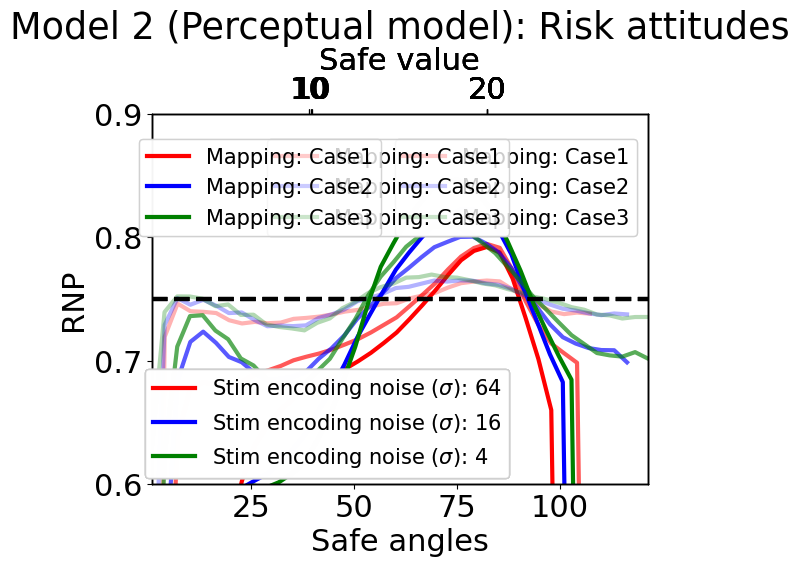

In [8]:
fig

# Different sensory noises for two options

In [ ]:
def rnp_diffNoises(stim_noise, safe_rep_noise, risky_rep_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri*90/np.pi)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # print("safeval - ", safeVal, "range val - ", val_range)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, safe_rep_noise , type)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, risky_rep_noise, risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        print(p_chose_risky[0,::2])
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp



safe angle -  1.0
[0.32900987 0.31919902 0.31070856 0.3036168  0.2979778  0.29382127
 0.29115275 0.28995463 0.29018804 0.29179536]
-0.8858556492175172
safe angle -  4.125882352941177
[0.30343421 0.30652238 0.31568162 0.33007141 0.34879286 0.37093907
 0.39565119 0.42213961 0.44970854 0.47776255]
0.6347049224007051
safe angle -  7.251764705882353
[0.24177351 0.27068001 0.30539113 0.34410689 0.38534515 0.42790088
 0.47080003 0.51326355 0.55466839 0.59452052]
0.7319072950164051
safe angle -  10.377647058823527
[0.18743438 0.23046825 0.27858658 0.33016732 0.38378247 0.43813433
 0.49205268 0.5445152  0.59467427 0.64187622]
0.7459255072566706
safe angle -  13.503529411764706
[0.14138958 0.1915425  0.24892245 0.31153181 0.37714837 0.44353213
 0.50864581 0.57081764 0.62880984 0.68183049]
0.7474950770866524
safe angle -  16.629411764705882
[0.10295975 0.15799725 0.2246759  0.29967702 0.37898777 0.45870352
 0.53560123 0.60738371 0.67267625 0.73086836]
0.7478706196364109
safe angle -  19.755294117

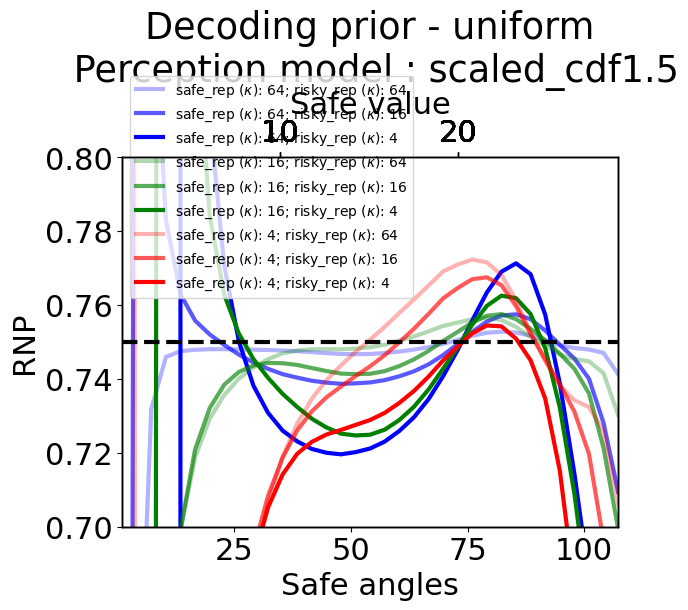

In [ ]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["scaled_cdf"]
# type = "curved_cdf_prior"

for type in types:

    # changeable parameters
    stim_list = [10000]
    safe_rep_list = [64, 16, 4]
    risky_rep_list = [64, 16, 4]
    # High stim noise
    # stim_list = [64, 16, 8, 4]
    # rep_list = [128]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    alphaList = np.linspace(0.3, 1.0, len(risky_rep_list))
    alphaList = alphaList[np.argsort(risky_rep_list)][::-1]
    colorList = ["b", "g", "r", "c", "m", "y", "k"]
    j = -1
    for stim_noise in stim_list:
        for safe_rep_noise in safe_rep_list:
            j = j+1
            i = -1
            for risky_rep_noise in risky_rep_list:
                i = i+1
                safe_angles, safeVals, rnp = rnp_diffNoises(stim_noise, safe_rep_noise, risky_rep_noise, type, risk_prob, experimentEffects)
                ax1.set_ylim(0.7, 0.8)
                ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

                text = "safe_rep ($\kappa$): "+str(safe_rep_noise) + "; risky_rep ($\kappa$): "+str(risky_rep_noise)
                ax1.plot(safe_angles[:]*90./np.pi, rnp[:], color=colorList[j], label = text, alpha =  alphaList[i])

                ax2 = ax1.twiny()
                if (type=="prior" or type=="curvedPrior" or type == "linearDecrease"):
                    ax2.set_xlim(max(safeVals), min(safe_angles))

                ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

    ax1.axhline(risk_prob, c='k', ls='--')
    ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")
    if type == "scaled_cdf":
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : " + type+str(tools.scaling)) 
    else:
        ax1.set_title("Decoding prior - " + tools.contextual_prior + "\n Perception model : " + type) 

    plt.savefig("/Users/sbedi/Downloads/diffNoises-perception"+tools.contextual_prior+".png",dpi=300, bbox_inches = "tight")
    

# Exaggerated risks by taking opposing noise regimes

In [ ]:
def find_rnp_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], safeNoise[0], safeNoise[1], type)
        safe_value, risky_prob = model.risky_value_dist((rangeOri), riskyNoise[0], riskyNoise[1], risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

    return safe_angles, safeVals, rnp




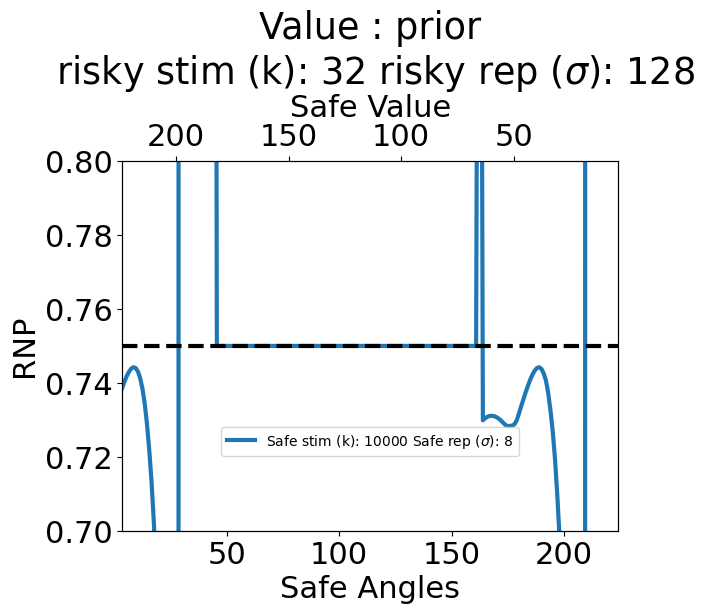

In [ ]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
type = "prior"

# changeable parameters
high_stim_list = [32]
low_stim_list = [10000]
high_rep_list = [8]
low_rep_list = [128]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for high_stim_noise in high_stim_list:
    for high_rep_noise in high_rep_list:
        for low_stim_noise in low_stim_list:
            for low_rep_noise in low_rep_list:

                safeNoise = [low_stim_noise, high_rep_noise]
                riskyNoise = [high_stim_noise, low_rep_noise]


                safe_angles, safeVals, rnp = find_rnp_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects)
                ax1.set_ylim(0.7, 0.8)
                ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))
                
                text = "Safe stim (k): "+ str(safeNoise[0])+" Safe rep ($\sigma$): "+str(safeNoise[1])
                # text = "Risky stim (k): "+ str(riskyNoise[0])+"; Risky rep ($\sigma$): "+str(riskyNoise[1])
                ax1.plot(safe_angles[:]*90./np.pi, rnp[:], label = text)

                ax2 = ax1.twiny()
                if (type=="prior" or type=="curvedPrior" or type == "linearDecrease"):
                    ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))

                ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)


ax1.axhline(risk_prob, c='k', ls='--')

ax1.legend(bbox_to_anchor=(0.5, 0.3), prop={'size': 10})
ax2.set_xlabel("Safe Value")
ax1.set_xlabel("Safe Angles")
ax1.set_ylabel("RNP")
# if len(safeNoise[0])==1 and len(safeNoise[1])==1:
# ax1.set_title("Value : " + type + "\n safe stim (k): "+str(safeNoise[0])+"; safe rep ($\sigma$): "+str(safeNoise[1]))
# else:
ax1.set_title("Value : " + type + "\n risky stim (k): "+str(riskyNoise[0])+" risky rep ($\sigma$): "+str(riskyNoise[1]))
plt.savefig('/Users/sbedi/Downloads/testfig1.png',dpi=300, bbox_inches = "tight")

In [ ]:
model.value_function_ori(150./90.*np.pi, "prior")

array(10.66025404)

# risk of an option

# different noise regimes


In [ ]:
# Prior
# Noise regimes

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior



# changeable parameters
high_stim_noise = 32
low_stim_noise = 1000
high_rep_noise = 32
low_rep_noise = 128

risk_prob = 0.75
type = "linearPrior"   

# Getting all the values from actual transformation
rangeOri = np.linspace(39/90., 22/90., 100)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], high_stim_noise, low_rep_noise , type, interpolation_kind = "linear", bins=25)

risky_value, risky_prob = model.risky_value_dist((rangeOri), low_stim_noise, high_rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])


# plt.legend(loc = 'lower right')

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

single option risk

In [ ]:
def inverse_monotonic(y_0, x = model.stim_grid, y = model.value_function_ori(model.stim_grid, type="prior")):
    indices = np.argsort(y)
    y_sorted = y[indices]
    
    def find_closest_index(y_0):
        i = np.searchsorted(y_sorted, y_0, side='left')
        if i == 0:
            return 0
        elif i == len(y_sorted):
            return len(y_sorted) - 1
        else:
            if y_0 - y_sorted[i-1] < y_sorted[i] - y_0:
                return i - 1
            else:
                return i

    i = find_closest_index(y_0)
    x_inverse = x[indices[i]]*90./np.pi
    
    return x_inverse


In [ ]:
# inverse_monotonic(28)*90./np.pi
model.value_function_ori(178/90.*np.pi, "prior")

array(2.69756474)

0.7499457222420786

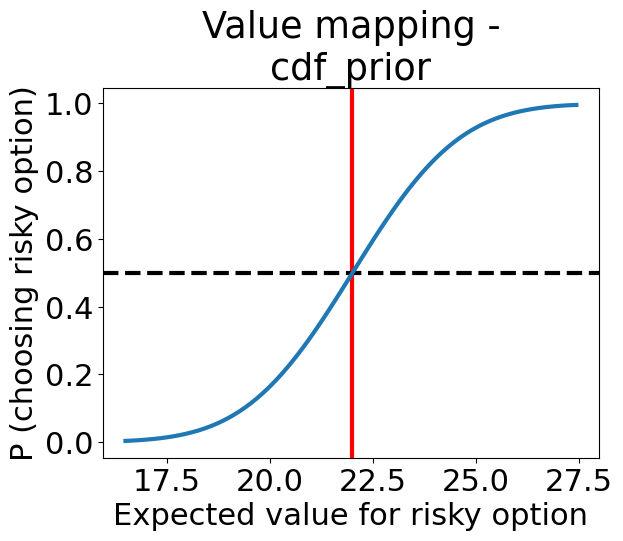

In [ ]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "cdf_prior" 

stim_noise = 1000
rep_noise = 32
start = 90

# Getting all the values from actual transformation
interval = 70
rangeOri = np.linspace(start/90., (start+interval)/90., 100)*np.pi
val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)


# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_noise, type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)


# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)



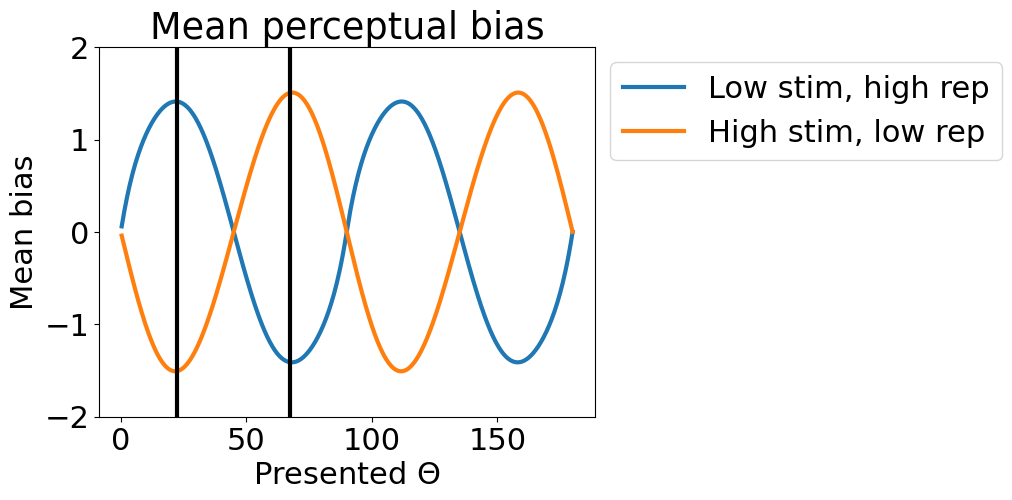

In [ ]:
theta0 = model.stim_ori_grid #0.8
# theta0 = theta0[:-1]
kappa1 = 10000
kappa2 = 8

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa, normalize = False)
# plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim")

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappas1, kappar1, normalize = False)
# plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, low rep")


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa2, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, high rep")



E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa2, kappa1, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "High stim, low rep")




plt.ylim(-2.0,2.0)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
# plt.axvline(112.5, c='k')
# plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('Mean perceptual bias')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

In [ ]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
types = ["cdf_prior", "scaled_cdf"]
# type = "curved_cdf_prior"

for type in types:

    # changeable parameters
    stim_list = [10000]
    rep_list = [64, 16, 4]
    # High stim noise
    # stim_list = [64, 16, 8, 4]
    # rep_list = [128]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for stim_noise in stim_list:
        for rep_noise in rep_list:

            safe_angles, safeVals, rnp = rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects)
            ax1.set_ylim(0.7, 0.8)
            ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

            text = "stim (k): "+ str(stim_noise)+"; rep ($\sigma$): "+str(rep_noise)
            ax1.plot(safe_angles[:]*90./np.pi, rnp[:], label = text)


            ax2 = ax1.twiny()
            if (type=="prior" or type=="curvedPrior" or type == "linearDecrease"):
                ax2.set_xlim(max(safeVals), min(safe_angles))

            ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

    ax1.axhline(risk_prob, c='k', ls='--')
    ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

    ax2.set_xlabel("Safe value")
    ax1.set_xlabel("Safe angles")
    ax1.set_ylabel("RNP")
    if type == "scaled_cdf":
        ax1.set_title("Exp range - " + tools.experimentRange + "\n Perception model : " + type+str(tools.scaling)) 
    else:
        ax1.set_title("Exp range - " + tools.experimentRange + "\n Perception model : " + type) 

    plt.savefig("/Users/sbedi/Downloads/"+tools.contextual_prior+"-perception-"+type+".png",dpi=300, bbox_inches = "tight")
    